In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt 
import numpy as np

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [2]:
N = nn.Sequential(nn.Linear(1,10), nn.Sigmoid(), nn.Linear(10,1, bias=False))
A = 1
Psi_t = lambda x: A + x * N(x)
f = lambda x, Psi: x**3 + 2*x + ((1+3*x**2)/(1+x+x**3))*x**2 - (x+(1+3*x**2)/(1+x+x**3))*Psi

In [3]:
def loss(x):
    x.requires_grad = True
    outputs = Psi_t(x)
    Psi_t_x = torch.autograd.grad(outputs, x, grad_outputs=torch.ones_like(outputs), create_graph=True)[0]
    return torch.mean((Psi_t_x - f(x, outputs))**2)

In [4]:
optimizer = torch.optim.LBFGS(N.parameters())
x = torch.Tensor(np.linspace(0,1,10)[:,None])
x

tensor([[0.0000],
        [0.1111],
        [0.2222],
        [0.3333],
        [0.4444],
        [0.5556],
        [0.6667],
        [0.7778],
        [0.8889],
        [1.0000]])

In [5]:
def closure():
    optimizer.zero_grad()
    l = loss(x)
    l.backward()
    return l

In [6]:
for i in range(10):
    optimizer.step(closure)

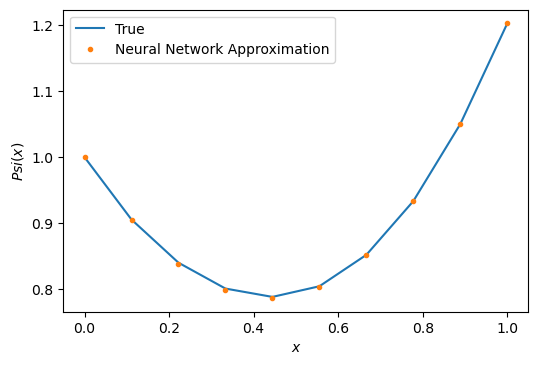

In [7]:
xx = np.linspace(0, 1, 10)[:,None]

with torch.no_grad():
    yy = Psi_t(torch.Tensor(xx)).numpy()
yt = xx**2 + np.exp(-xx**2 / 2)/(1+xx+xx**3)

fig, axs = plt.subplots(dpi=100)
axs.plot(xx, yt, label="True")
axs.plot(xx, yy, ".", label="Neural Network Approximation")
axs.set_xlabel("$x$")
axs.set_ylabel("$Psi(x)$")
plt.legend(loc="best")

In [8]:
from sklearn.metrics import r2_score

score = r2_score(yt, yy)
score

0.9999217509874553

In [9]:
error = yt - yy
error

array([[0.00000000e+00],
       [4.18607043e-04],
       [1.90367637e-03],
       [2.31529444e-03],
       [1.65024400e-03],
       [7.13180789e-04],
       [1.59611670e-04],
       [4.70303632e-05],
       [2.04316630e-05],
       [1.28326539e-05]])

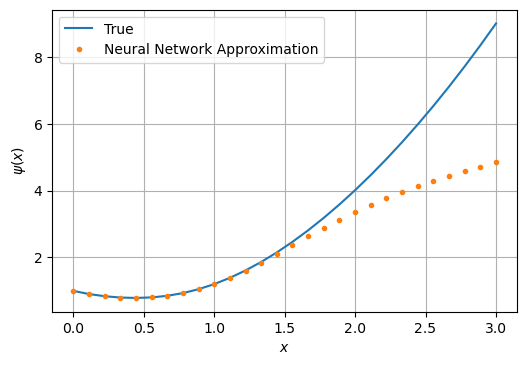

In [10]:
xxx = np.linspace(0,3,28)[:,None]
with torch.no_grad():
    yyy = Psi_t(torch.Tensor(xxx)).numpy()
yyt = xxx**2 + np.exp(-xxx**2 / 2)/(1+xxx+xxx**3)

fig, axs = plt.subplots(dpi=100)
axs.plot(xxx, yyt, label="True")
axs.plot(xxx, yyy, ".", label="Neural Network Approximation")
axs.set_xlabel("$x$")
axs.set_ylabel("$\psi(x)$")
plt.grid()
plt.legend(loc="best")

In [11]:
error = yyt - yyy
error

array([[0.00000000e+00],
       [4.18607043e-04],
       [1.90367637e-03],
       [2.31529444e-03],
       [1.65024400e-03],
       [7.13180789e-04],
       [1.59611670e-04],
       [4.70303632e-05],
       [2.04316630e-05],
       [1.29518632e-05],
       [1.12322763e-03],
       [6.25939707e-03],
       [2.02714851e-02],
       [4.95138645e-02],
       [1.01010522e-01],
       [1.81501751e-01],
       [2.96656624e-01],
       [4.50601258e-01],
       [6.45791863e-01],
       [8.83161244e-01],
       [1.16241666e+00],
       [1.48239867e+00],
       [1.84140998e+00],
       [2.23750203e+00],
       [2.66866404e+00],
       [3.13297480e+00],
       [3.62867382e+00],
       [4.15420891e+00]])

In [12]:
score = r2_score(yyt, yyy)
score

0.67395481685126